<center> <h1>Module 1 - Simple Linear Regression</h1> </center>
<center> <h2>Class Coding Analysis</h2> </center>

## Data and Description

**This is the same data set used in the Module 1 Course Notes. You can check all of the code you create here with the output from the course notes to verify you are getting the correct results.**

Recent increases in gas prices make buyers more prone to purchase a car with better gas mileage, as measured by the **miles per gallon (MPG)**. Because of this, car manufacturers are increasingly trying to produce the car that gives the best MPG. Complicating this process are the many factors that go into determining what gas mileage a car will achieve on the road.

One such factor is the **weight** of the car. While 
it is generally understood that heavier cars will experience fewer MPG, there is little understanding of how much an increase in weight will lead to a decrease MPG. By understanding this relationship, manufacturers will be able to perform a cost--benefit analysis that will assist them in their vehicle production.

The MPG data set contains measurements of the **weight (column 1)** (in pounds) and **MPG (column 2)** of 289 cars. Download the MPGData.txt file from Canvas, and put it in the same folder as this R Markdown file. Now, read in the data set, take a look at the top few rows, and look at a summary of the data.  

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.api as sm

In [2]:
cars = pd.read_table("MPGData.txt", 
                     delimiter = ' ')
cars.head()

,Weight,MPG
0,3436,18.0
1,3433,16.0
2,3449,17.0
3,3086,14.0
4,2372,24.0


In [3]:
cars.describe()

,Weight,MPG
count,289.000000,289.000000
mean,2535.038062,26.659170
std,484.110527,6.699974
min,1613.000000,13.000000
25%,2130.000000,21.000000
50%,2489.000000,26.000000
75%,2930.000000,31.500000
max,3465.000000,46.600000


## Scatterplot

#### Create a scatterplot of the data with variables on the appropriate axes.

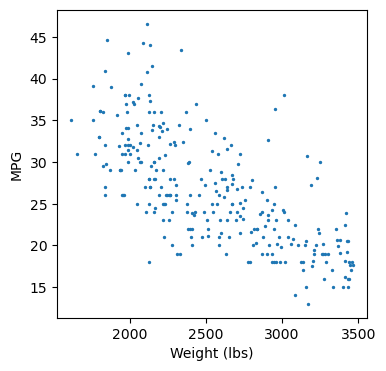

In [11]:
fig = plt.figure(figsize = (4, 4))
plt.scatter(x = cars['Weight'], 
            y = cars['MPG'], 
            s = 2)
plt.ylabel("MPG")
plt.xlabel("Weight (lbs)")
plt.show()

## Correlation Coefficient 

#### Report the correlation coefficient for the two variables.

In [13]:
corr_matrix = cars.corr()
# print(corr_matrix)
corr_matrix.loc['MPG', 'Weight']

-0.7105168356679543

## Linear Regression

#### Apply linear regression to the data, and save the residuals and fitted values to the `cars` data frame.

In [15]:
# Prepare data
y = cars['MPG']
X = sm.add_constant(cars['Weight'])
# print(X)

In [16]:
# Fit simple linear regression model using ordinary least squares
mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     292.6
Date:                Fri, 05 Jan 2024   Prob (F-statistic):           1.04e-45
Time:                        10:33:14   Log-Likelihood:                -857.72
No. Observations:                 289   AIC:                             1719.
Df Residuals:                     287   BIC:                             1727.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.5872      1.484     34.773      0.0

In [18]:
# dir(res)

In [19]:
cars['residuals'] = res.resid
cars['fittedvalues'] = res.fittedvalues
cars.head()

,Weight,MPG,residuals,fittedvalues
0,3436,18.0,0.200334,17.799666
1,3433,16.0,-1.829166,17.829166
2,3449,17.0,-0.671832,17.671832
3,3086,14.0,-7.241350,21.241350
4,2372,24.0,-4.262385,28.262385


#### Add the OLS regression line to the scatterplot.

In [23]:
x = cars['Weight']
y = cars['MPG']
# print(res.params[0])
# print(res.params[1])

const     51.587169
Weight    -0.009833
dtype: float64


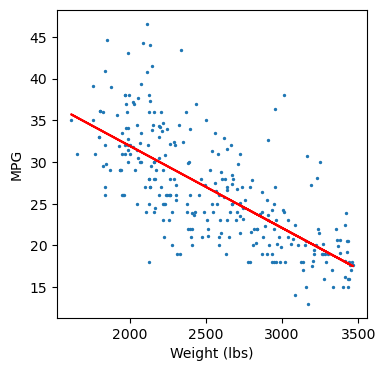

In [25]:
fig = plt.figure(figsize = (4, 4))
plt.scatter(x, 
            y, 
            s = 2)
plt.plot(x, 
         res.params[0] + res.params[1] * x, 
         'r') 
plt.ylabel("MPG")
plt.xlabel("Weight (lbs)")
plt.show()

#### Calculate the residuals in the data set *"by hand"* (using Python, not just pulling the residuals from the model output) - do your calculations match the values in the residuals column of the data set?

In [26]:
resids = cars['MPG'] - cars['fittedvalues']
resids.head()

0    0.200334
1   -1.829166
2   -0.671832
3   -7.241350
4   -4.262385
dtype: float64

#### What is the average MPG for a car weighing 2500 pounds?

In [27]:
# Option 1
print(res.params[0] + res.params[1] * 2500)

27.00371222415415


In [28]:
# Option 2
print(res.predict([1, 2500])) # option 2

[27.00371222]


#### Calculate the MSE, or the average squared variability of the residuals around the line.

In [30]:
sum(res.resid ** 2) / (res.df_resid)

22.30526775978537

In [29]:
# res.df_resid

287.0

In [31]:
# DO NOT DO THIS! YOU WILL GET THE WRONG ANSWER
# from sklearn.metrics import mean_squared_error
# mean_squared_error(cars['MPG'], res.predict()) 

22.150906045184783

## Summary and Conclusions

*Always* start by plotting your data (exploratory data analysis: view data, create scatterplot, summarize data, etc.) before jumping into an analysis or fitting a model. We saw MPG and Weight looked to be linearly associated, so we chose to look at the correlation coefficient and then fit a simple linear regression model to the data. Make sure you know how to interpret the model coefficients!